## UTS Pengolahan Citra Digital 
### - Nama : Hafizh Hilman Asyhari
### - NIM : 202331206
### - Kelas : D
### - Program Studi : Teknik Informatika
### - Tahun : 2025
### - Project 1 Citra Warna 

In [1]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Import Library
Pada bagian ini, dilakukan pemanggilan terhadap beberapa pustaka penting yang digunakan dalam pengolahan citra digital:

- `import cv2`  
  OpenCV digunakan untuk membaca dan mengolah gambar, termasuk mengubah format warna dan melakukan splitting warna.

- `import matplotlib.pyplot as plt`  
  Matplotlib, khususnya modul pyplot, digunakan untuk menampilkan gambar ke dalam grid visual yang terstruktur dengan baik.

- `import numpy as np`  
  NumPy digunakan untuk membuat dan memanipulasi array numerik, yang sangat berguna saat memproses kanal-kanal warna secara manual.


In [2]:
# Membaca gambar
img = cv2.imread('Foto-Citra-Namaku.jpg')  
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB untuk matplotlib

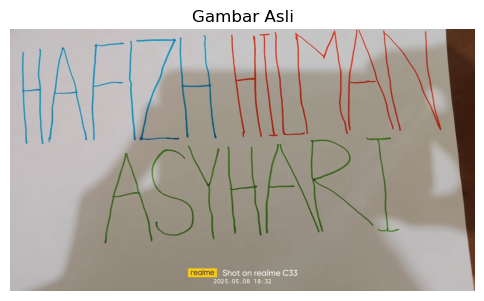

In [3]:
# Menampilkan gambar asli
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.axis('off')
plt.show()

In [4]:
# Konversi gambar ke HSV untuk deteksi warna
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## --- MASK WARNA MERAH ---

In [5]:
# Rentang bawah dan atas warna merah
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])
mask_red = cv2.inRange(hsv, lower_red1, upper_red1) | cv2.inRange(hsv, lower_red2, upper_red2)
red_result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)

In [6]:
# --- MASK WARNA HIJAU ---
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)
green_result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_green)

In [7]:
# --- MASK WARNA BIRU ---
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
blue_result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_blue)

(-0.5, 1279.5, 719.5, -0.5)

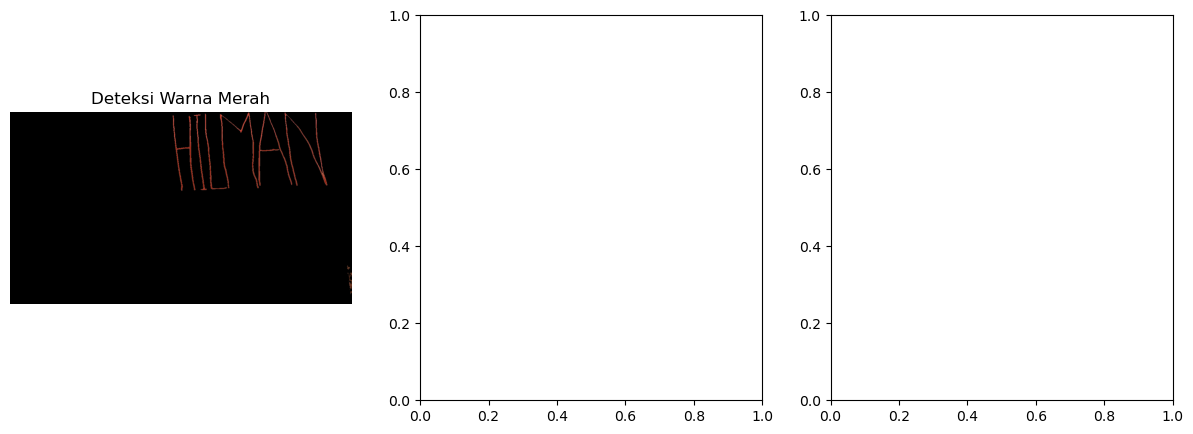

In [8]:
# --- TAMPILKAN HASIL MASKING ---
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(red_result)
axs[0].set_title('Deteksi Warna Merah')
axs[0].axis('off')

In [9]:
axs[1].imshow(green_result)
axs[1].set_title('Deteksi Warna Hijau')
axs[1].axis('off')

(-0.5, 1279.5, 719.5, -0.5)

In [10]:
axs[2].imshow(blue_result)
axs[2].set_title('Deteksi Warna Biru')
axs[2].axis('off')

plt.show()

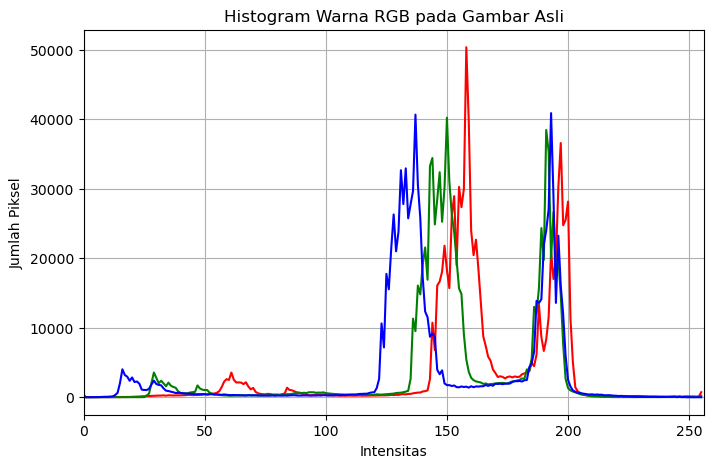

In [11]:
# --- HISTOGRAM RGB UNTUK GAMBAR ASLI ---
colors = ('r', 'g', 'b')
plt.figure(figsize=(8, 5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Histogram Warna RGB pada Gambar Asli')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.grid(True) 
plt.show()

# Percobaan 2

In [12]:
# Import pustaka yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Membaca gambar
img = cv2.imread('Foto-Citra-Namaku.jpg')         # Gambar dalam format BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # Konversi ke RGB

In [14]:
# Split channel RGB
r, g, b = cv2.split(img_rgb)                      # Channel Merah, Hijau, Biru

In [15]:
# Hitung histogram untuk masing-masing channel
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

Text(0.5, 0.98, 'Deteksi Warna dan Histogram RGB')

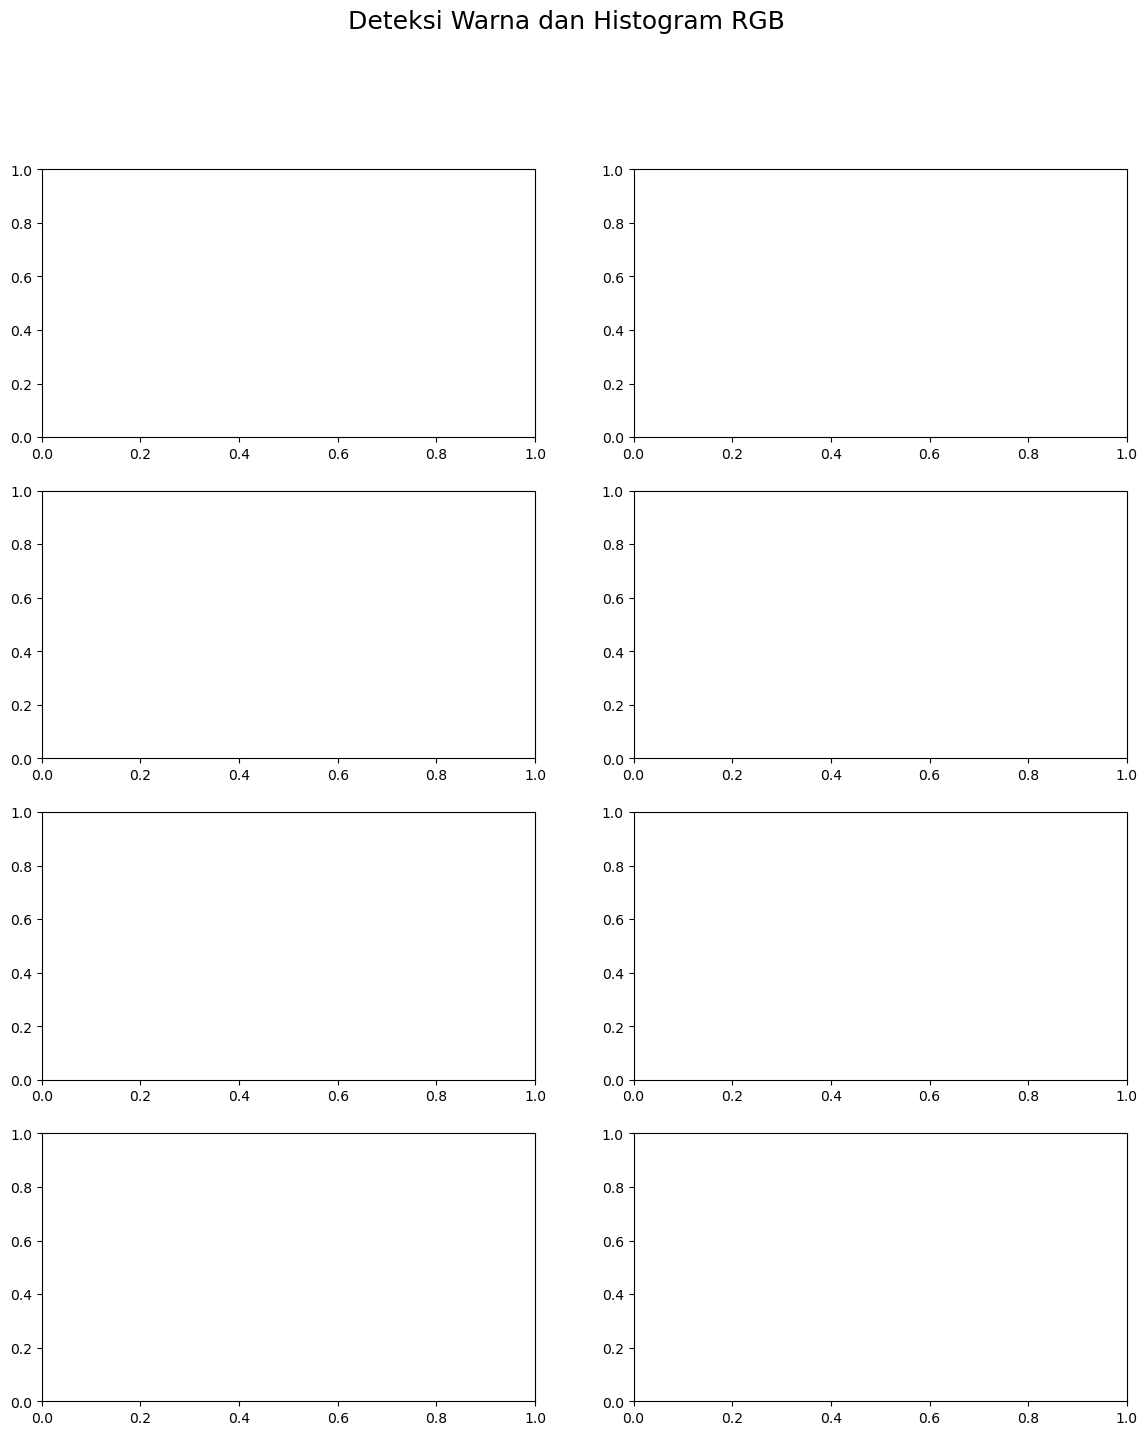

In [16]:
# Setup layout 4x4
fig, axs = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle('Deteksi Warna dan Histogram RGB', fontsize=18)

In [17]:
# ---------------- Baris 1 ----------------
# RGB Image
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("Gambar Asli (RGB)")
axs[0, 0].axis("off")

(-0.5, 1279.5, 719.5, -0.5)

In [18]:
# RGB Histogram
axs[0, 1].plot(hist_r, color='r', label='Red')
axs[0, 1].plot(hist_g, color='g', label='Green')
axs[0, 1].plot(hist_b, color='b', label='Blue')
axs[0, 1].set_title("Histogram RGB")
axs[0, 1].legend()
axs[0, 1].grid(True)

In [19]:
# ---------------- Baris 2 ----------------
# Red Channel
axs[1, 0].imshow(r, cmap='Reds')
axs[1, 0].set_title("Channel Merah (Red)")
axs[1, 0].axis("off")

# Red Histogram
axs[1, 1].plot(hist_r, color='r')
axs[1, 1].set_title("Histogram Merah")
axs[1, 1].grid(True)


In [20]:
# ---------------- Baris 3 ----------------
# Green Channel
axs[2, 0].imshow(g, cmap='Greens')
axs[2, 0].set_title("Channel Hijau (Green)")
axs[2, 0].axis("off")

(-0.5, 1279.5, 719.5, -0.5)

In [21]:
# Green Histogram
axs[2, 1].plot(hist_g, color='g')
axs[2, 1].set_title("Histogram Hijau")
axs[2, 1].grid(True)

### ---------------- Baris 4 ----------------

In [22]:
# Blue Channel
axs[3, 0].imshow(b, cmap='Blues')
axs[3, 0].set_title("Channel Biru (Blue)")
axs[3, 0].axis("off")

(-0.5, 1279.5, 719.5, -0.5)

In [23]:
# Blue Histogram
axs[3, 1].plot(hist_b, color='b')
axs[3, 1].set_title("Histogram Biru")
axs[3, 1].grid(True)


In [24]:
# Layout rapi
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

<Figure size 640x480 with 0 Axes>